<a href="https://colab.research.google.com/github/tofighi/MachineLearning/blob/master/knn_simple_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,x,y,Color
0,-1,1,red
1,0,1,blue
2,0,2,red
3,1,-1,red
4,1,0,blue
5,1,2,blue
6,2,2,red
7,2,3,blue


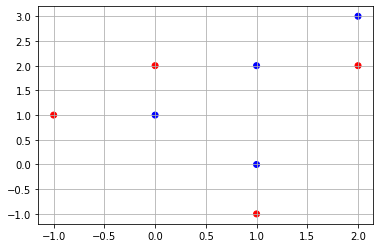

In [ ]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_class ="""
x,y,Color
-1,1,red
0,1,blue
0,2,red
1,-1,red
1,0,blue
1,2,blue
2,2,red
2,3,blue
"""

df = pd.read_csv(StringIO(data_class))
plt.scatter(df.x,df.y,c=df.Color)
plt.grid(True)
df

## Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
X = df[['x','y']] # Feature Matrix
y = df ['Color']  # Target Value
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### Classifying a new data point

Predicted Color: ['blue']


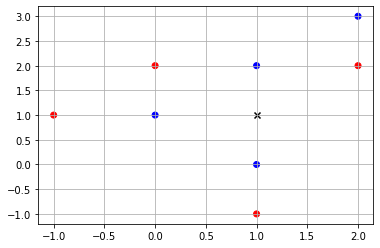

In [ ]:
new_point = [1, 1]
print("Predicted Color:",neigh.predict([new_point]))
plt.scatter(df.x,df.y,c=df.Color)
plt.grid(True)
plt.scatter(new_point[0],new_point[1],c='black',marker='x')

## Regression

,x,y,Price
0,-1,1,100
1,0,1,50
2,0,2,20
3,1,-1,40
4,1,0,30
5,1,2,40
6,2,2,70
7,2,3,30


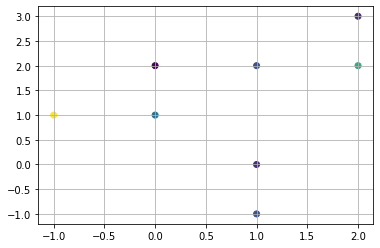

In [ ]:
data_reg ="""
x,y,Price
-1,1,100
0,1,50
0,2,20
1,-1,40
1,0,30
1,2,40
2,2,70
2,3,30
"""

df2 = pd.read_csv(StringIO(data_reg))
plt.scatter(df2.x,df2.y,c=df2.Price)
plt.grid(True)
df2


### Training the k-nn Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor(n_neighbors=3)
X = df2[['x','y']] # Feature Matrix
y = df2 ['Price']  # Target Value
neigh_reg.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

### Calculating the value for new data point

Predicted Price: [40.]


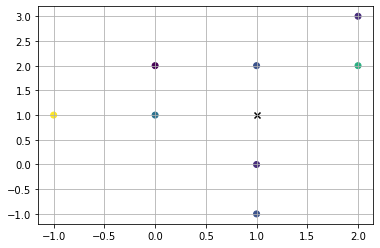

In [ ]:
new_point = [1, 1]
print("Predicted Price:",neigh_reg.predict([new_point]))
plt.scatter(df2.x,df2.y,c=df2.Price)
plt.grid(True)
plt.scatter(new_point[0],new_point[1],c='black',marker='x')

# kNN Example on IRIS dataset

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paste your TRAIN data here as a string
train_data = """
6.7,3.3,5.7,2.5,Iris-virginica
5.1,3.5,1.4,0.3,Iris-setosa
5.5,2.6,4.4,1.2,Iris-versicolor
5.2,3.5,1.5,0.2,Iris-setosa
6.4,3.2,4.5,1.5,Iris-versicolor
6.8,3.0,5.5,2.1,Iris-virginica
5.5,2.3,4.0,1.3,Iris-versicolor
6.3,2.3,4.4,1.3,Iris-versicolor
5.4,3.4,1.7,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
6.7,3.1,5.6,2.4,Iris-virginica
6.4,3.2,5.3,2.3,Iris-virginica
6.1,2.6,5.6,1.4,Iris-virginica
5.7,2.9,4.2,1.3,Iris-versicolor
5.0,3.5,1.3,0.3,Iris-setosa
6.4,2.7,5.3,1.9,Iris-virginica
4.9,3.1,1.5,0.1,Iris-setosa
7.7,2.8,6.7,2.0,Iris-virginica
5.8,2.7,3.9,1.2,Iris-versicolor
5.1,2.5,3.0,1.1,Iris-versicolor
5.0,2.0,3.5,1.0,Iris-versicolor
6.3,3.3,6.0,2.5,Iris-virginica
4.5,2.3,1.3,0.3,Iris-setosa
6.2,2.9,4.3,1.3,Iris-versicolor
4.6,3.6,1.0,0.2,Iris-setosa
6.1,3.0,4.9,1.8,Iris-virginica
5.7,3.8,1.7,0.3,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
5.7,2.6,3.5,1.0,Iris-versicolor
4.3,3.0,1.1,0.1,Iris-setosa
6.7,3.0,5.2,2.3,Iris-virginica
5.4,3.9,1.3,0.4,Iris-setosa
7.6,3.0,6.6,2.1,Iris-virginica
5.6,3.0,4.1,1.3,Iris-versicolor
5.1,3.8,1.6,0.2,Iris-setosa
6.2,3.4,5.4,2.3,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
4.8,3.4,1.9,0.2,Iris-setosa
6.9,3.1,5.4,2.1,Iris-virginica
6.0,2.9,4.5,1.5,Iris-versicolor
5.5,2.4,3.7,1.0,Iris-versicolor
5.5,2.5,4.0,1.3,Iris-versicolor
5.9,3.0,5.1,1.8,Iris-virginica
5.8,4.0,1.2,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.2,1.4,0.2,Iris-setosa
6.7,3.0,5.0,1.7,Iris-versicolor
7.2,3.2,6.0,1.8,Iris-virginica
6.2,2.2,4.5,1.5,Iris-versicolor
5.0,3.2,1.2,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
6.3,2.8,5.1,1.5,Iris-virginica
4.7,3.2,1.6,0.2,Iris-setosa
6.5,2.8,4.6,1.5,Iris-versicolor
6.3,2.5,5.0,1.9,Iris-virginica
7.4,2.8,6.1,1.9,Iris-virginica
5.6,2.5,3.9,1.1,Iris-versicolor
4.9,3.1,1.5,0.1,Iris-setosa
5.7,2.8,4.1,1.3,Iris-versicolor
5.0,3.6,1.4,0.2,Iris-setosa
5.8,2.7,5.1,1.9,Iris-virginica
7.9,3.8,6.4,2.0,Iris-virginica
5.4,3.7,1.5,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.7,3.0,4.2,1.2,Iris-versicolor
6.1,2.8,4.7,1.2,Iris-versicolor
7.7,3.8,6.7,2.2,Iris-virginica
6.0,2.7,5.1,1.6,Iris-versicolor
5.5,3.5,1.3,0.2,Iris-setosa
4.9,2.4,3.3,1.0,Iris-versicolor
6.4,2.8,5.6,2.1,Iris-virginica
6.4,2.8,5.6,2.2,Iris-virginica
5.2,3.4,1.4,0.2,Iris-setosa
5.0,3.3,1.4,0.2,Iris-setosa
5.9,3.2,4.8,1.8,Iris-versicolor
4.9,3.0,1.4,0.2,Iris-setosa
6.8,3.2,5.9,2.3,Iris-virginica
5.0,3.4,1.6,0.4,Iris-setosa
5.0,3.5,1.6,0.6,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
6.3,3.4,5.6,2.4,Iris-virginica
6.9,3.2,5.7,2.3,Iris-virginica
6.5,3.2,5.1,2.0,Iris-virginica
5.3,3.7,1.5,0.2,Iris-setosa
6.6,2.9,4.6,1.3,Iris-versicolor
"""

# Paste your TEST data here as a string
test_data = """
4.8,3.0,1.4,0.1,Iris-setosa
6.1,2.9,4.7,1.4,Iris-versicolor
5.0,3.0,1.6,0.2,Iris-setosa
6.7,2.5,5.8,1.8,Iris-virginica
5.0,2.3,3.3,1.0,Iris-versicolor
6.0,3.0,4.8,1.8,Iris-virginica
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
6.1,3.0,4.6,1.4,Iris-versicolor
6.7,3.1,4.4,1.4,Iris-versicolor
6.6,3.0,4.4,1.4,Iris-versicolor
5.5,4.2,1.4,0.2,Iris-setosa
5.8,2.8,5.1,2.4,Iris-virginica
6.4,3.1,5.5,1.8,Iris-virginica
6.0,2.2,5.0,1.5,Iris-virginica
6.5,3.0,5.5,1.8,Iris-virginica
6.0,2.2,4.0,1.0,Iris-versicolor
6.1,2.8,4.0,1.3,Iris-versicolor
6.9,3.1,4.9,1.5,Iris-versicolor
5.8,2.6,4.0,1.2,Iris-versicolor
"""

def parse_data(data):
    X, y = [], []
    for line in data.strip().split('\n'):
        parts = line.strip().split(',')
        if len(parts) != 5:
            continue
        X.append([float(p) for p in parts[:4]])
        y.append(parts[4])
    return np.array(X), np.array(y)

X_train, y_train = parse_data(train_data)
X_test, y_test = parse_data(test_data)

# Create, train, and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.95

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.95        20
      macro avg       0.97      0.94      0.95        20
   weighted avg       0.96      0.95      0.95        20

